# Pymaceuticals Inc.
---

### Analysis


 

The bar graph illustrates that the Capomulin Drug Regimen boasts the highest number of mice (230), while Propriva exhibits the lowest (182). Additionally, when categorized by gender, there are 124 female mice and 125 male mice.

A strong positive correlation of 0.84 exists between mouse weight and average tumor volume. This indicates that as the weight of the mouse increases, so does the average tumor volume.

Through regression analysis, we gained insight into the extent to which average tumor volume (dependent variable) changes in response to fluctuations in mouse weight (independent variable).

Among the selected treatments, Capomulin and Ramicane demonstrate superior tumor size reduction, as evidenced by the box plot graph.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress, pearsonr


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [ ]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [ ]:
# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')


In [ ]:
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Checking the number of mice.
numbered_mice = combined_df['Mouse ID'].nunique()
print("Number of mice:", numbered_mice)

Number of mice: 249


In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint

duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]



In [ ]:
# Get the duplicate mice by ID number
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [ ]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

if not duplicate_mice.empty:
    print("Duplicate mice by ID number:")
    print(duplicate_mice['Mouse ID'].unique())
else:
    print("No duplicate mice found.")

Duplicate mice by ID number:
['g989']


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = combined_df[combined_df['Mouse ID'] == 'g989']
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop_duplicates(subset=['Mouse ID'], keep='first')
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [ ]:
# Checking the number of mice in the clean DataFrame.
numbered_mice = cleaned_df['Mouse ID'].nunique()
print("Number of mice:", numbered_mice)

Number of mice: 249


## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_stats = cleaned_df.groupby('Drug Regimen').agg(
    mean_tumor_volume=('Tumor Volume (mm3)', 'mean'),
    median_tumor_volume=('Tumor Volume (mm3)', 'median'),
    tumor_volume_variance=('Tumor Volume (mm3)', 'var'),
    tumor_volume_stdev=('Tumor Volume (mm3)', 'std'),
    tumor_volume_sem=('Tumor Volume (mm3)', 'sem')
)

# Display the summary statistics for each drug regimen
summary_stats

,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_stdev,tumor_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby('Drug Regimen').agg(
    Mean=('Tumor Volume (mm3)', 'mean'),
    Median=('Tumor Volume (mm3)', 'median'),
    Variance=('Tumor Volume (mm3)', 'var'),
    Std_Dev=('Tumor Volume (mm3)', 'std'),
    SEM=('Tumor Volume (mm3)', 'sem')
)

summary_stats

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

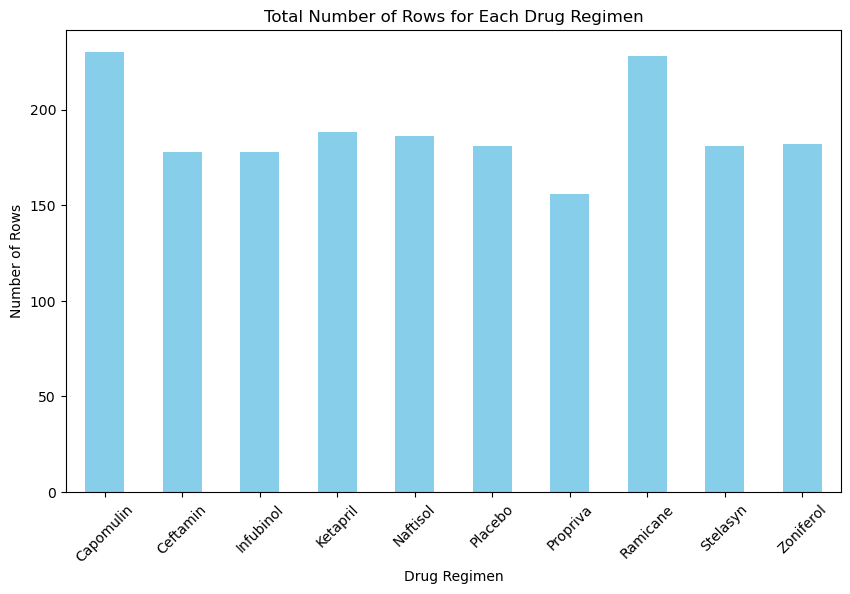

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = cleaned_df.groupby('Drug Regimen').size()

# Create a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

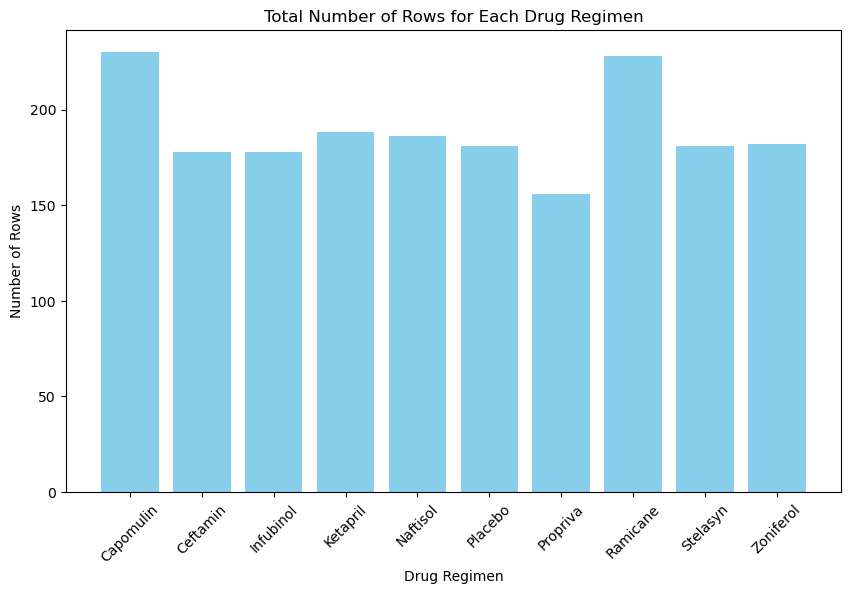

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_df.groupby('Drug Regimen').size()

# Create a bar plot using Matplotlib's pyplot
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='skyblue')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

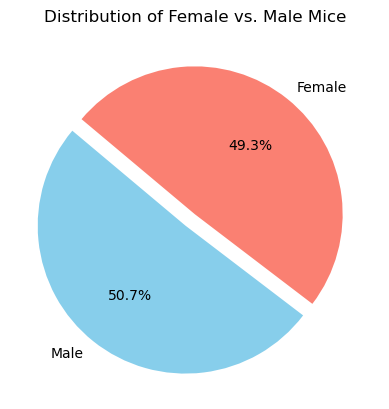

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_counts = cleaned_df['Sex'].value_counts()

# Create a pie plot using Pandas
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], explode=(0.1, 0), startangle=140)
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('')
plt.show()

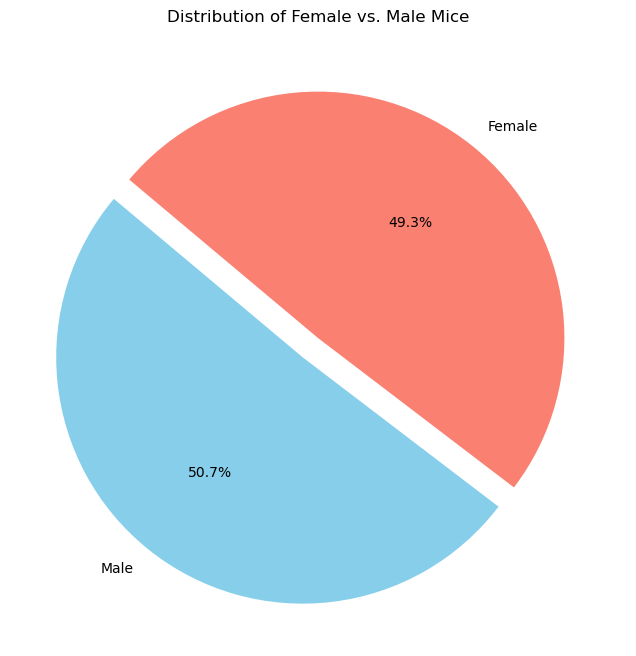

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = cleaned_df['Sex'].value_counts()

# Create a pie plot using Matplotlib's pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'], explode=(0.1, 0), startangle=140)
plt.title('Distribution of Female vs. Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


In [ ]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(cleaned_df, last_timepoint_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the merged DataFrame containing the tumor volume at the last timepoint for each mouse
merged_df

,Mouse ID,Timepoint
0,a203,0
1,a251,0
2,a262,0
3,a275,0
4,a366,0
...,...,...
244,z435,0
245,z578,0
246,z581,0
247,z795,0


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin", "Ketapril", "Naftisol", "Placebo", "Propriva", "Stelasyn", "Zonferol"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# # Calculate the IQR and quantitatively determine if there are any potential outliers.

drug_regimens = merged_df['Drug Regimen'].unique()

# Define a subset condition (e.g., Tumor Volume greater than a certain value)
subset_condition = merged_df['Tumor Volume (mm3)'] > 45

# Iterate over each drug regimen to locate the rows and get the tumor volumes
for drug in drug_regimens:
    # Filter the DataFrame for the specific drug regimen
    drug_df = merged_df[merged_df['Drug Regimen'] == drug]
    subset_df = drug_df[subset_condition]
# Get the tumor volumes for the mice on the current drug regimen that meet the subset condition
    tumor_volume_data = subset_df['Tumor Volume (mm3)']
    
    # Display the drug regimen, subset condition, and corresponding tumor volumes
    print(f"Drug Regimen: {drug}")
    print("Subset Condition: Tumor Volume > 45")
    print("Tumor Volumes:")
    print(tumor_volume_data)
    print()

  


Drug Regimen: Ramicane
Subset Condition: Tumor Volume > 45
Tumor Volumes:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Capomulin
Subset Condition: Tumor Volume > 45
Tumor Volumes:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Infubinol
Subset Condition: Tumor Volume > 45
Tumor Volumes:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Placebo
Subset Condition: Tumor Volume > 45
Tumor Volumes:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Ceftamin
Subset Condition: Tumor Volume > 45
Tumor Volumes:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Stelasyn
Subset Condition: Tumor Volume > 45
Tumor Volumes:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Zoniferol
Subset Condition: Tumor Volume > 45
Tumor Volumes:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Drug Regimen: Ketapril
Subset Condition: Tumor Volume > 45
Tumor Volumes:
Series([], Name: Tumor Volum

C:\Users\Student\AppData\Local\Temp\ipykernel_12324\1696489931.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = drug_df[subset_condition]
C:\Users\Student\AppData\Local\Temp\ipykernel_12324\1696489931.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = drug_df[subset_condition]
C:\Users\Student\AppData\Local\Temp\ipykernel_12324\1696489931.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = drug_df[subset_condition]
C:\Users\Student\AppData\Local\Temp\ipykernel_12324\1696489931.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = drug_df[subset_condition]
C:\Users\Student\AppData\Local\Temp\ipykernel_12324\1696489931.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = drug_df[subset_condition]
C:\Users\Student\AppData\Local\Temp\ipykernel_12324\1696489931.py:19: 

In [ ]:
# List of unique drug regimens in the DataFrame
drug_regimens = merged_df['Drug Regimen'].unique()

# Define a subset condition (e.g., Tumor Volume greater than a certain value)
subset_condition = merged_df['Tumor Volume (mm3)'] > 45

# Iterate over each drug regimen to determine outliers based on the subset condition
for drug in drug_regimens:
    # Filter the DataFrame for the specific drug regimen
    drug_df = merged_df[merged_df['Drug Regimen'] == drug]
    
    # Apply the subset condition
    subset_df = drug_df[subset_condition]
    
    # Calculate quartiles for the subset
    quartiles = subset_df['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine upper and lower bounds for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers based on the subset and bounds
    potential_outliers = subset_df[(subset_df['Tumor Volume (mm3)'] < lower_bound) | (subset_df['Tumor Volume (mm3)'] > upper_bound)]
    
    # Display the drug regimen, subset condition, and potential outliers
    print(f"Drug Regimen: {drug}")
    print("Subset Condition: Tumor Volume > 45")
    print("Potential Outliers:")
    print(potential_outliers)
    print()

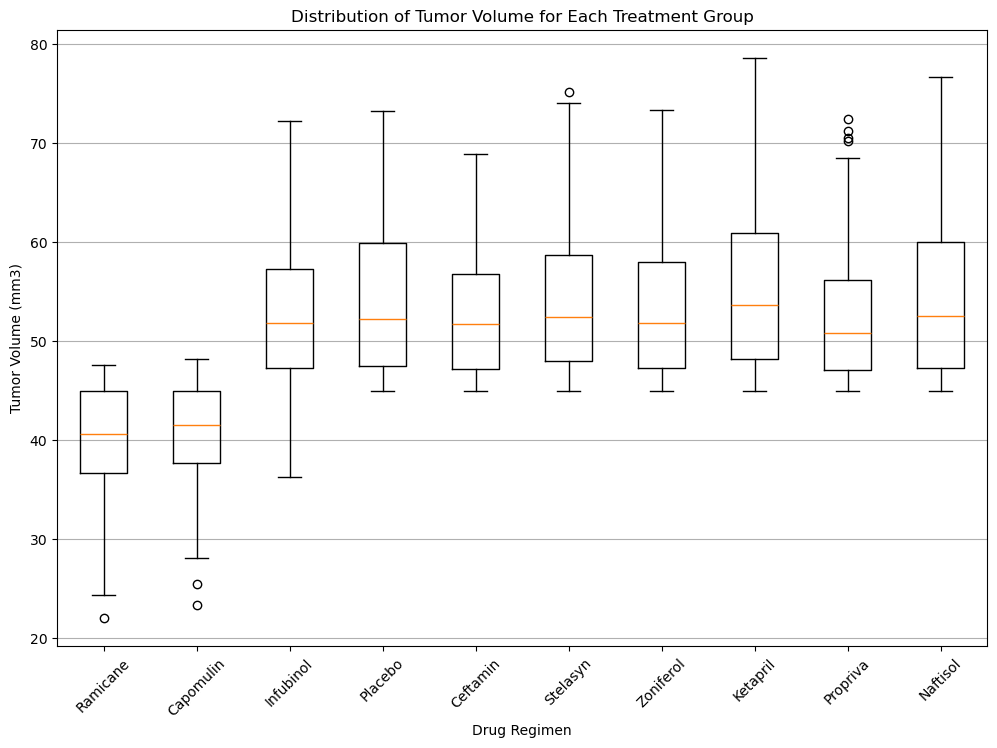

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(12, 8))
plt.boxplot([combined_df[combined_df['Drug Regimen'] == drug]['Tumor Volume (mm3)'] for drug in drug_regimens], labels=drug_regimens)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Line and Scatter Plots

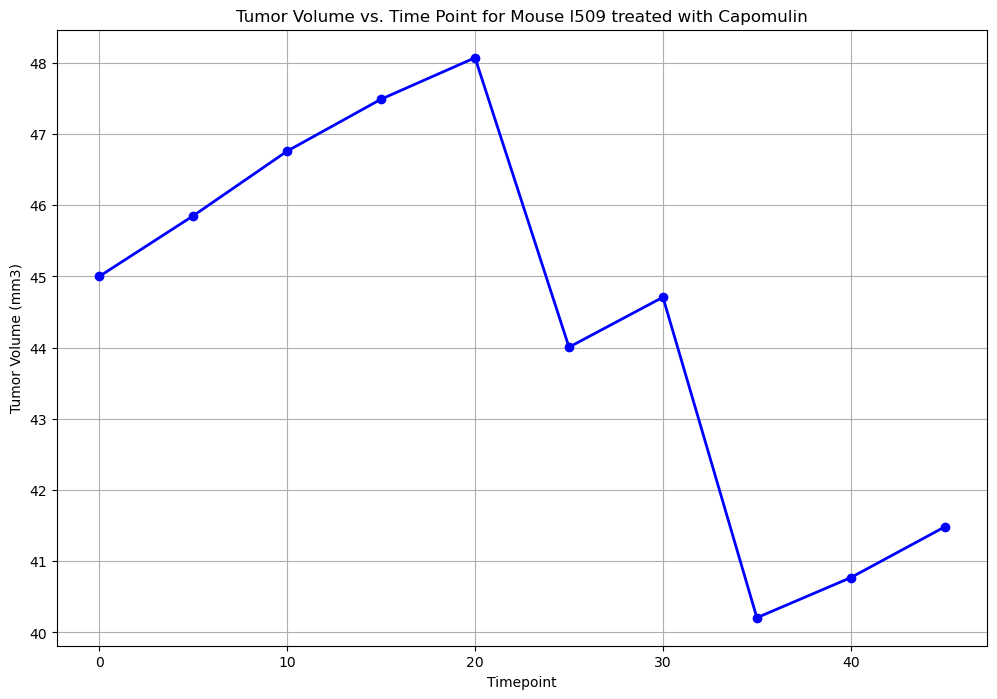

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a single mouse ID treated with Capomulin
mouse_id = 'l509'  # Example mouse ID 's185'

# Filter the DataFrame for the selected mouse treated with Capomulin
mouse_data = combined_df[(combined_df['Drug Regimen'] == 'Capomulin') & (combined_df['Mouse ID'] == mouse_id)]

# # Create a line plot for tumor volume vs. time point for the selected mouse
plt.figure(figsize=(12, 8))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', linewidth=2)
plt.xlabel('Timepoint Days')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
plt.grid(True)
plt.show()

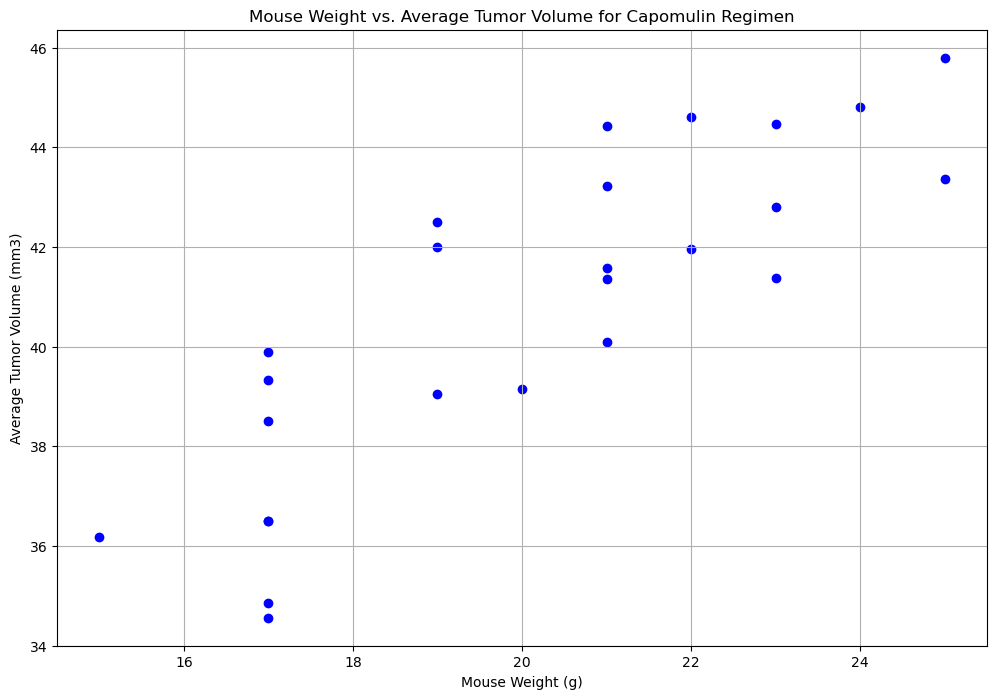

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the DataFrame for the Capomulin regimen
capomulin_data = combined_df[combined_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse based on weight
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a scatter plot of mouse weight vs. average tumor volume for Capomulin regimen
plt.figure(figsize=(12, 8))
plt.scatter(mouse_weight, avg_tumor_volume, color='b', marker='o')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.grid(True)
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


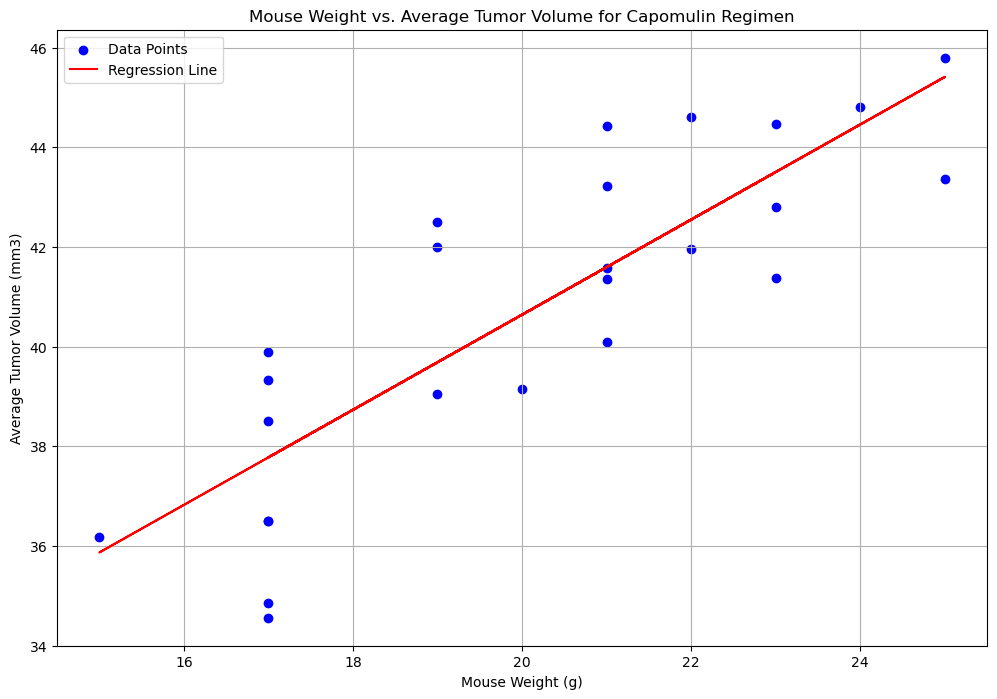

Correlation Coefficient: 0.8419363424694722
Linear Regression Model: y = 0.95x + 21.55


In [ ]:
# Filter the DataFrame for the Capomulin regimen
capomulin_data = combined_df[combined_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse based on weight
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = np.corrcoef(mouse_weight, avg_tumor_volume)[0, 1]

# Perform linear regression for mouse weight and average tumor volume
slope, intercept = np.polyfit(mouse_weight, avg_tumor_volume, 1)

# Create scatter plot and plot the regression line
plt.figure(figsize=(12, 8))
plt.scatter(mouse_weight, avg_tumor_volume, color='b', label='Data Points')
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='r', label='Regression Line')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.legend()
plt.grid(True)
plt.show()

# Display the correlation coefficient and linear regression equation
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")